In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [37]:
data=pd.read_csv(r'C:\Users\Jose\Desktop\insurance.csv')

In [38]:
print (data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

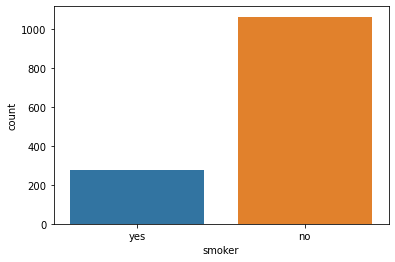

In [42]:
sns.countplot(x='smoker',data=data)

<AxesSubplot:xlabel='smoker', ylabel='count'>

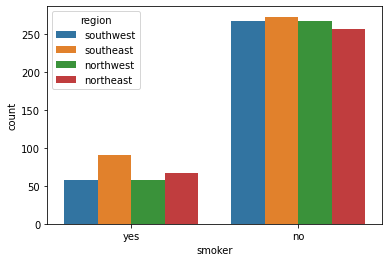

In [43]:
sns.countplot(x='smoker',hue='region',data=data)

<AxesSubplot:xlabel='smoker', ylabel='count'>

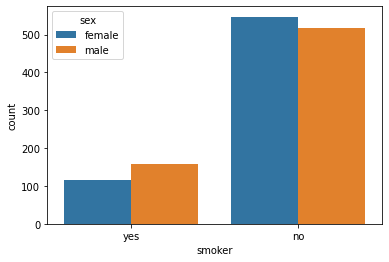

In [44]:
sns.countplot(x='smoker',hue='sex',data=data)

<AxesSubplot:xlabel='smoker', ylabel='count'>

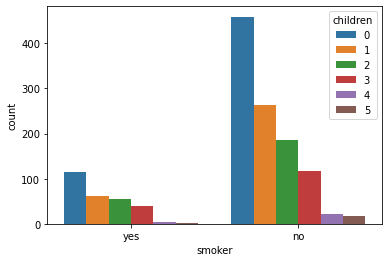

In [45]:
sns.countplot(x='smoker',hue='children',data=data)

<AxesSubplot:ylabel='Frequency'>

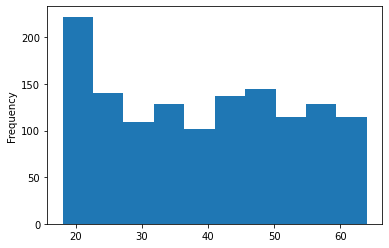

In [46]:
data['age'].plot.hist()

<AxesSubplot:xlabel='children', ylabel='count'>

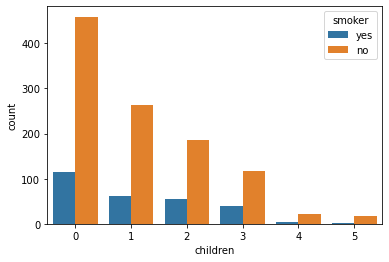

In [47]:
sns.countplot(x='children',hue='smoker',data=data)

#DATAWRANGLIN

In [48]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<AxesSubplot:xlabel='sex', ylabel='age'>

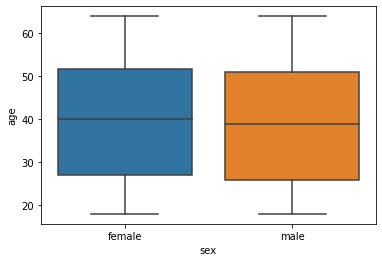

In [49]:
sns.boxplot(x='sex',y='age',data=data)

<AxesSubplot:xlabel='smoker', ylabel='age'>

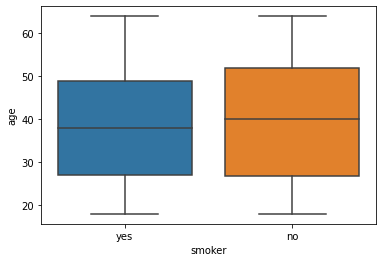

In [50]:
sns.boxplot(x='smoker',y='age',data=data)

In [51]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [52]:
data.drop(['bmi'],axis=1,inplace=True)

In [53]:
data.head()

,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520


In [54]:
sex=pd.get_dummies(data['sex'],drop_first=True)
sex.head()

,male
0,0
1,1
2,1
3,1
4,1


In [55]:
smoker=pd.get_dummies(['smoker'],drop_first=True)
smoker.head(10)

""
0


In [56]:
region=pd.get_dummies(data['region'],drop_first=False)
region.head(10)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [57]:
data.dtypes

age           int64
sex          object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [58]:
data.head()

,age,sex,children,smoker,region,charges
0,19,female,0,yes,southwest,16884.92400
1,18,male,1,no,southeast,1725.55230
2,28,male,3,no,southeast,4449.46200
3,33,male,0,no,northwest,21984.47061
4,32,male,0,no,northwest,3866.85520


In [59]:
data=pd.concat([data,region,sex,smoker],axis=1)

In [60]:
data.head(10)

,age,sex,children,smoker,region,charges,northeast,northwest,southeast,southwest,male
0,19,female,0,yes,southwest,16884.92400,0,0,0,1,0
1,18,male,1,no,southeast,1725.55230,0,0,1,0,1
2,28,male,3,no,southeast,4449.46200,0,0,1,0,1
3,33,male,0,no,northwest,21984.47061,0,1,0,0,1
4,32,male,0,no,northwest,3866.85520,0,1,0,0,1
5,31,female,0,no,southeast,3756.62160,0,0,1,0,0
6,46,female,1,no,southeast,8240.58960,0,0,1,0,0
7,37,female,3,no,northwest,7281.50560,0,1,0,0,0
8,37,male,2,no,northeast,6406.41070,1,0,0,0,1
9,60,female,0,no,northwest,28923.13692,0,1,0,0,0


In [61]:
data.drop(['smoker','sex','region'],axis=1,inplace=True)

In [62]:
data.head()

,age,children,charges,northeast,northwest,southeast,southwest,male
0,19,0,16884.92400,0,0,0,1,0
1,18,1,1725.55230,0,0,1,0,1
2,28,3,4449.46200,0,0,1,0,1
3,33,0,21984.47061,0,1,0,0,1
4,32,0,3866.85520,0,1,0,0,1


In [63]:
X = data.drop('charges', axis=1)
y = data['charges']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)

In [72]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)
mse = mean_squared_error(y_test, y_pred)

Mean Squared Error: 132970791.2593128


In [73]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 11531.296165623047
